In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
!pip install seaborn

In [49]:
!pip install pandas

In [50]:
!pip install matplotlib

In [51]:
df=pd.read_csv('Data_Sets/CarPriceDataset.csv')

In [52]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0
2,3,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2018,4.0
3,4,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,28000,2,73,2012,5.1
4,5,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,40000,2,73,2012,4.0


In [53]:
df.shape

(150, 13)

In [54]:
df.describe()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
count,150.000000,150.000000,147.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,2573.346667,15.870748,36673.753333,2.320000,222.046667,2015.553333,62.030733
std,43.445368,1687.191300,6.884811,19426.665542,0.698224,209.008312,3.398651,98.571347
min,1.000000,0.000000,3.800000,3600.000000,2.000000,27.000000,2005.000000,0.800000
25%,38.250000,1462.000000,10.430000,23721.500000,2.000000,74.000000,2014.000000,4.765000
50%,75.500000,1997.000000,15.000000,36000.000000,2.000000,131.000000,2016.000000,19.980000
75%,112.750000,2998.000000,20.170000,45647.250000,2.000000,314.000000,2018.000000,80.000000
max,150.000000,6749.000000,47.450000,130000.000000,5.000000,985.000000,2021.000000,605.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   Company          150 non-null    object 
 2   Model            150 non-null    object 
 3   Type             150 non-null    object 
 4   Fuel             150 non-null    object 
 5   Transmission     150 non-null    object 
 6   Engine           150 non-null    int64  
 7   Mileage          147 non-null    float64
 8   Kms_driven       150 non-null    int64  
 9   Buyers           150 non-null    int64  
 10  Horsepower (kw)  150 non-null    int64  
 11  Year             150 non-null    int64  
 12  Price (Lakhs)    150 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 15.4+ KB


## Data Preprocessing

In [56]:
df.isnull().sum()

ID                 0
Company            0
Model              0
Type               0
Fuel               0
Transmission       0
Engine             0
Mileage            3
Kms_driven         0
Buyers             0
Horsepower (kw)    0
Year               0
Price (Lakhs)      0
dtype: int64

In [57]:
import numpy as np
x=np.array([5,10,12,7,15,3000])
np.median(x)

np.float64(11.0)

In [58]:
numerical_columns=df.select_dtypes(include=['number','int','float']).columns

In [59]:
df[numerical_columns].head()

,ID,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,796,19.7,45000,2,32,2010,1.2
1,2,998,20.5,40005,2,46,2011,3.0
2,3,998,20.5,40005,2,46,2018,4.0
3,4,1462,18.5,28000,2,73,2012,5.1
4,5,1462,18.5,40000,2,73,2012,4.0


In [60]:
catogerical_columns=df.select_dtypes(include=['object','category']).columns

In [61]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,Maruti,Alto,Hatchback,Petrol,Manual
1,Maruti,Wagon R,Hatchback,Petrol,Manual
2,Maruti,Wagon R,Hatchback,Petrol,Manual
3,Maruti,Ertiga,MUV,Petrol,Automatic
4,Maruti,Ertiga,MUV,Petrol,Automatic


/tmp/ipykernel_3920/2078059552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable',y='value',data=df_melt,palette='pastel')


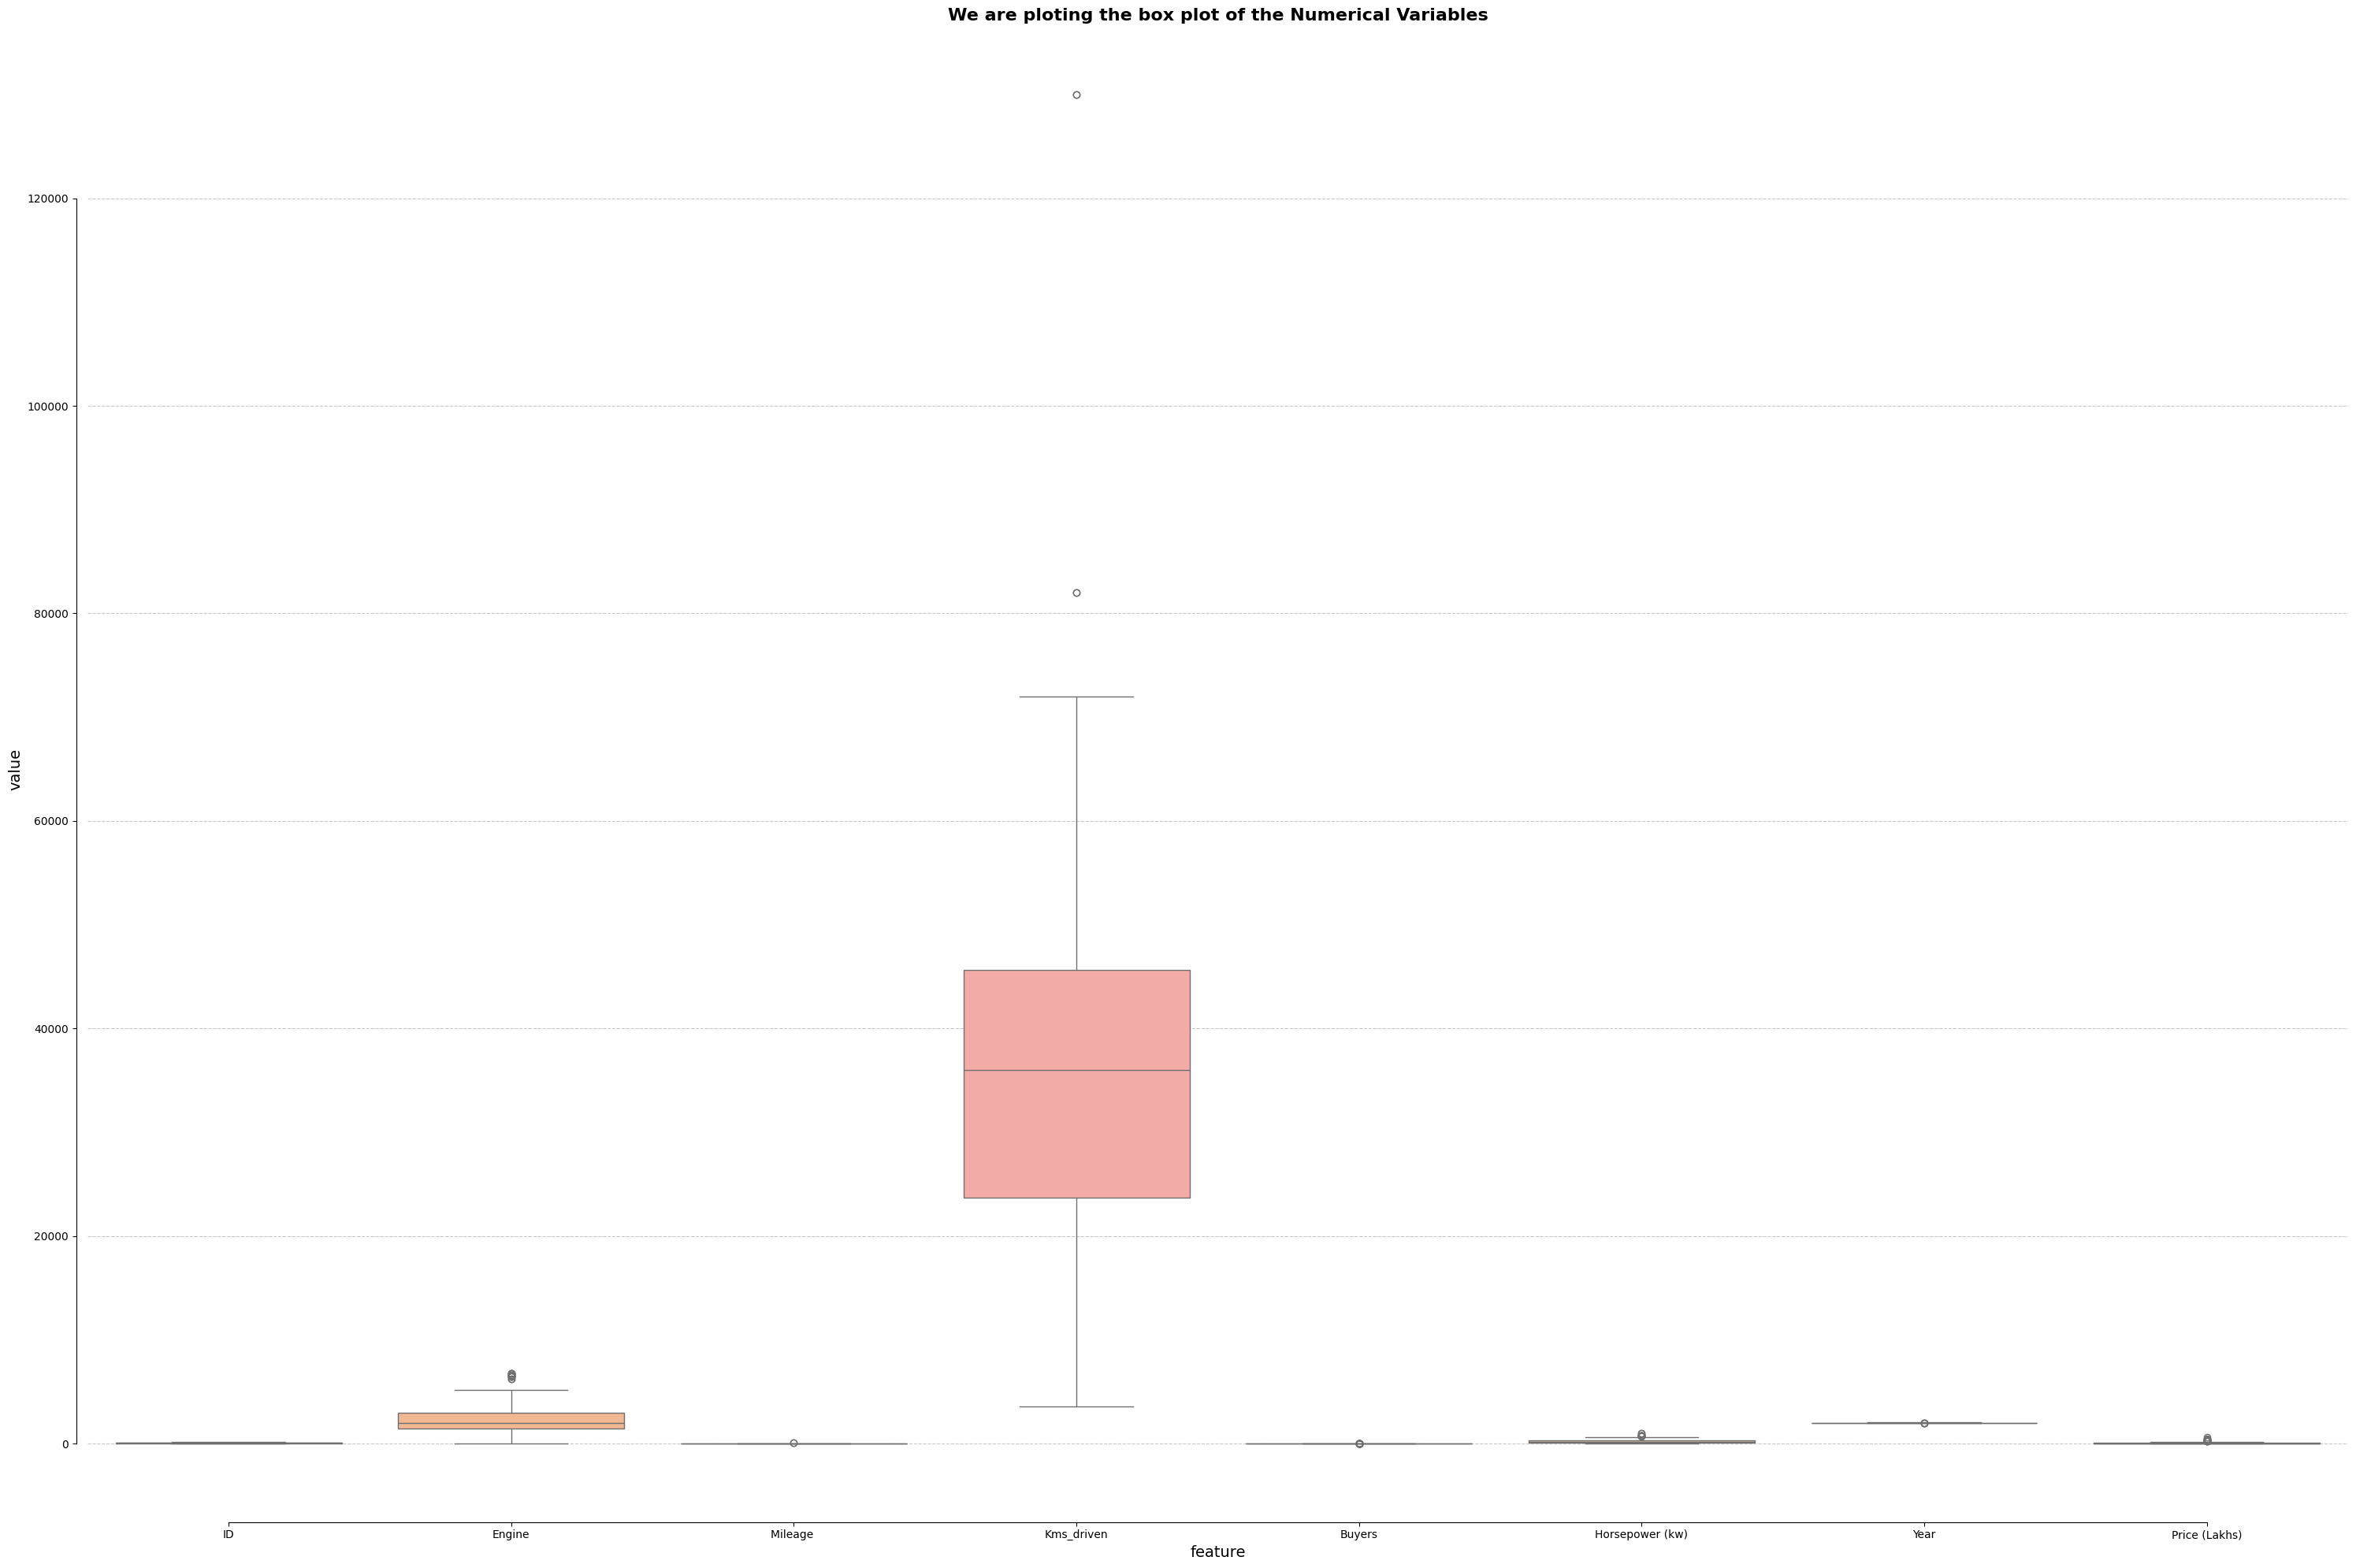

In [62]:
df_melt=df.melt(value_vars=numerical_columns)
plt.figure(figsize=(30,20))
sns.boxplot(x='variable',y='value',data=df_melt,palette='pastel')
plt.title('We are ploting the box plot of the Numerical Variables',fontsize=16,weight='bold')
plt.xlabel('feature',fontsize=14)
plt.ylabel('value',fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
sns.despine(offset=10,trim=True)
plt.tight_layout()
plt.show() 

In [63]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())

In [64]:
df.isnull().sum()

ID                 0
Company            0
Model              0
Type               0
Fuel               0
Transmission       0
Engine             0
Mileage            0
Kms_driven         0
Buyers             0
Horsepower (kw)    0
Year               0
Price (Lakhs)      0
dtype: int64

In [66]:
df.drop('ID',axis=1,inplace=True)


In [67]:
df.head()

,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,Maruti,Alto,Hatchback,Petrol,Manual,796,19.7,45000,2,32,2010,1.2
1,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2011,3.0
2,Maruti,Wagon R,Hatchback,Petrol,Manual,998,20.5,40005,2,46,2018,4.0
3,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,28000,2,73,2012,5.1
4,Maruti,Ertiga,MUV,Petrol,Automatic,1462,18.5,40000,2,73,2012,4.0


In [68]:
df[catogerical_columns].head()

,Company,Model,Type,Fuel,Transmission
0,Maruti,Alto,Hatchback,Petrol,Manual
1,Maruti,Wagon R,Hatchback,Petrol,Manual
2,Maruti,Wagon R,Hatchback,Petrol,Manual
3,Maruti,Ertiga,MUV,Petrol,Automatic
4,Maruti,Ertiga,MUV,Petrol,Automatic


In [69]:
catogerical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
catogerical_columns

['Company', 'Model', 'Type', 'Fuel', 'Transmission']

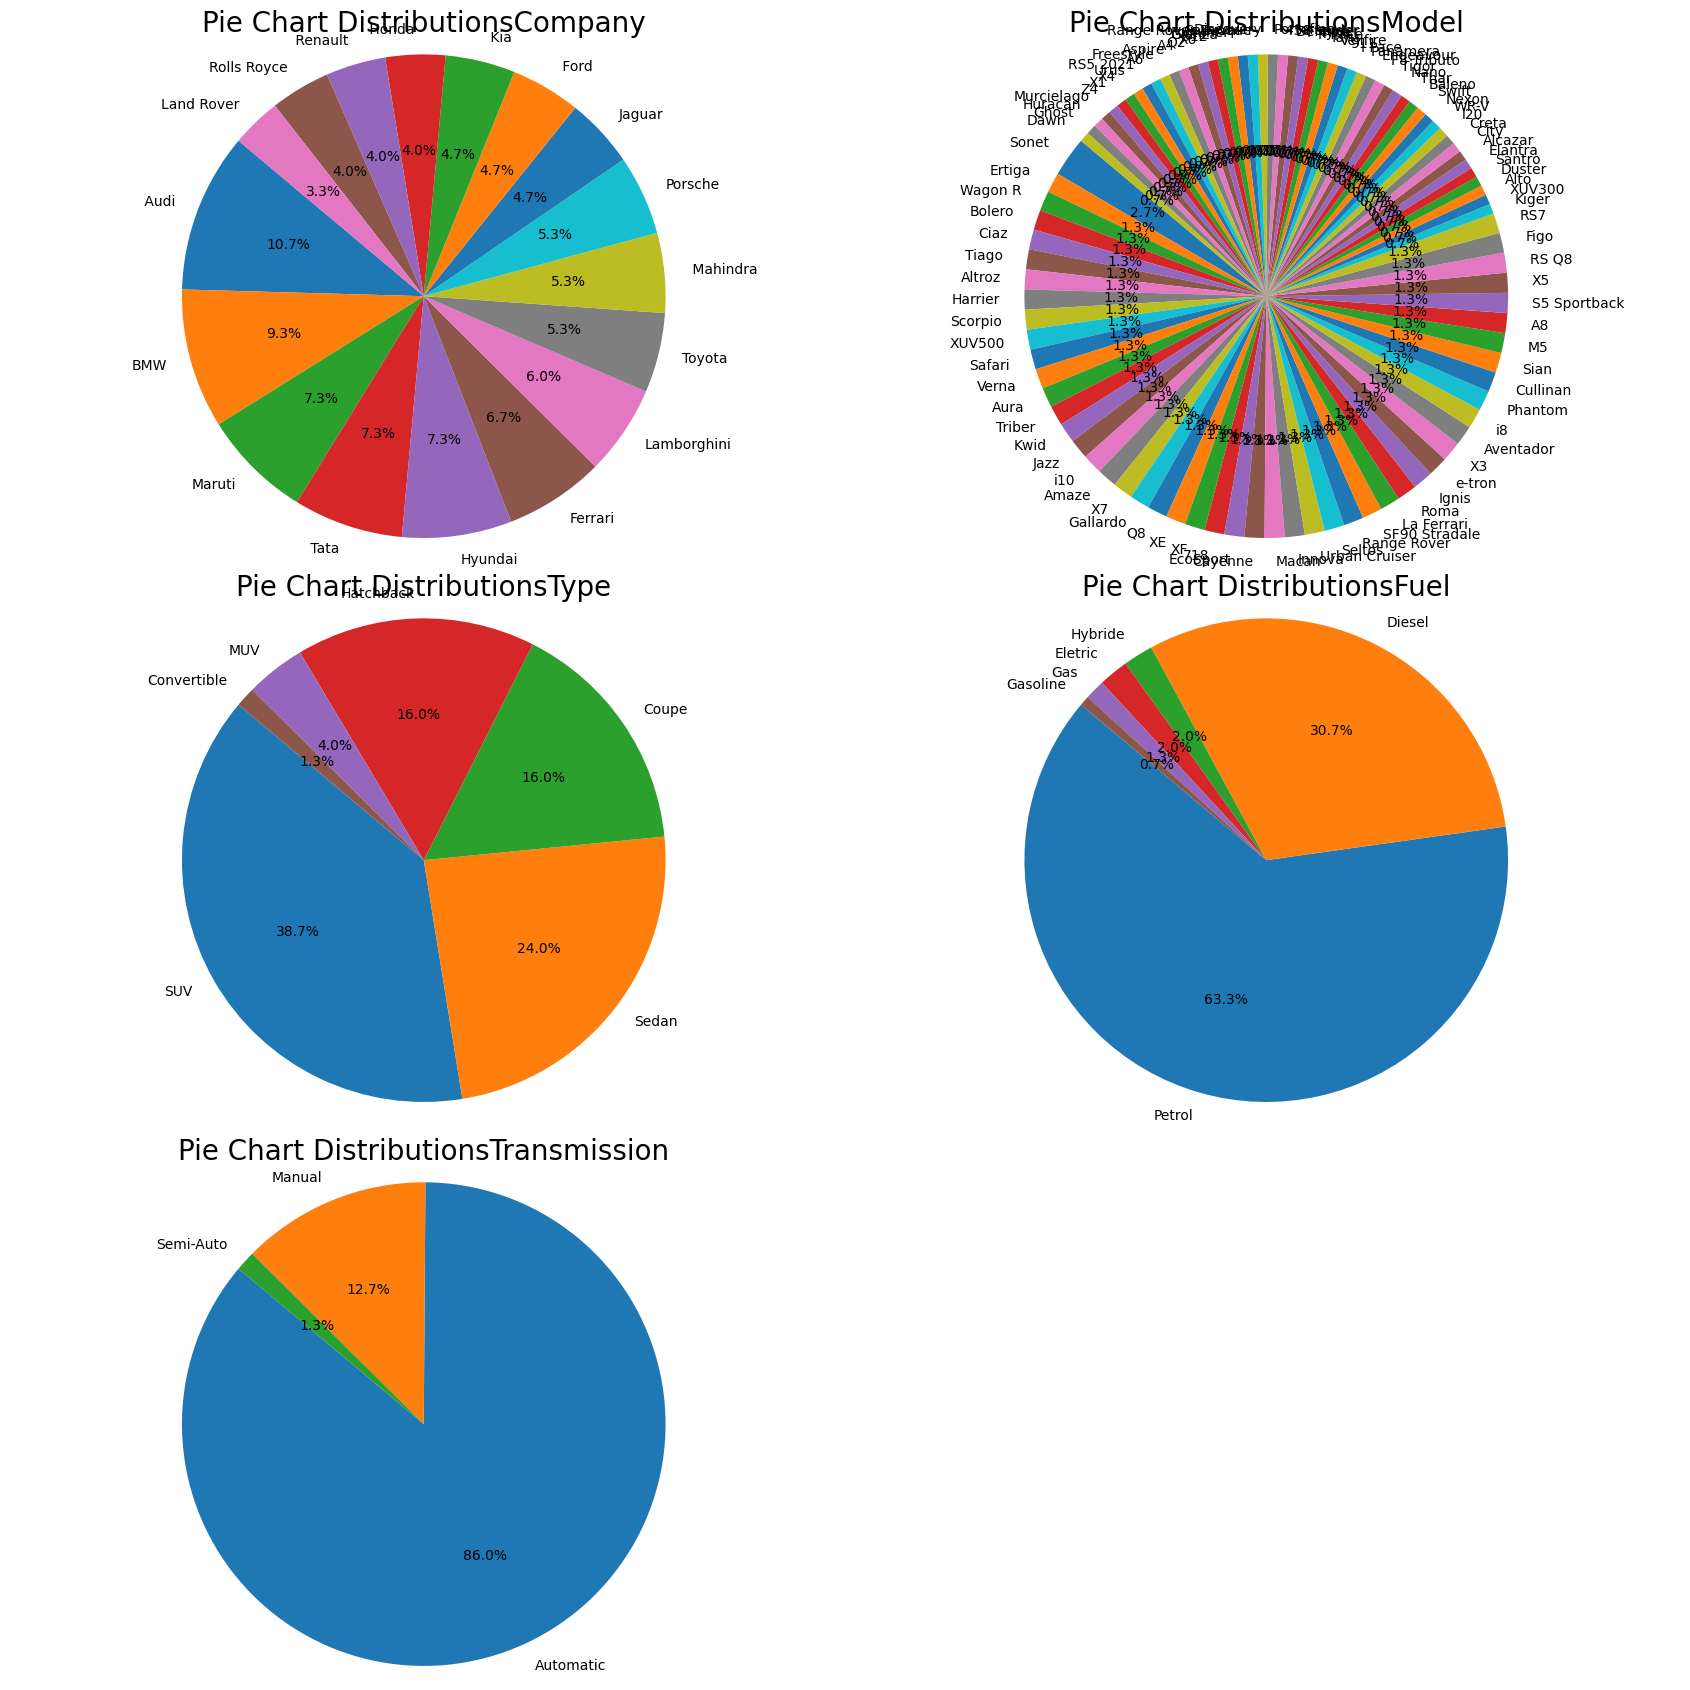

In [72]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(17,17))
axes=axes.flatten()

for i,col in enumerate(catogerical_columns):
    value_counts=df[col].value_counts()
    axes[i].pie(value_counts,labels=value_counts.index,autopct='%1.1f%%',startangle=140)
    axes[i].set_title(f'Pie Chart Distributions{col}',fontsize=20)
    axes[i].axis('equal')

for j in range(len(catogerical_columns),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()        